In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
df=pd.read_csv("train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
df.info

<bound method DataFrame.info of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [7]:
X=df.drop('label',axis=1)
y=df["label"]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=100)

In [9]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((31500, 784), (31500,), (10500, 784), (10500,))

### Model Application

In [10]:
mod_lg= LogisticRegression().fit(X_train,y_train)
y_pred=mod_lg.predict(X_test)
acc_lg=metrics.accuracy_score(y_pred,y_test)
acc_lg   

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9114285714285715

In [11]:
print("confusion_matrix test is:\n ", metrics.confusion_matrix(y_test, y_pred))

confusion_matrix test is:
  [[1015    0    5    5    3    9    7    3    2    1]
 [   0 1137    5    7    1    2    0    1    8    3]
 [   9   11  882   17   10    6   11   13   35    8]
 [   4    2   28  945    0   35    1    4   20    9]
 [   1    7    9    2  914    4   15    3    9   45]
 [   9    5    6   38   15  821   22    6   52   21]
 [   8    2   10    0    9    7 1008    3    4    0]
 [   3    5   16    9    9    2    1  984    2   45]
 [   9   22    8   34    4   30   13    5  904   11]
 [   4    1    2   11   25   11    0   35   16  960]]


In [12]:
print("precision: ", metrics.precision_score(y_test,y_pred, average='macro'))
print("recall:",metrics.recall_score(y_test,y_pred,average='macro'))

precision:  0.9107332000883737
recall: 0.9100624815770422


### SVM

In [13]:
mod_svc= SVC(C=1).fit(X_train,y_train)
y_pred=mod_svc.predict(X_test)
acc_svc=metrics.accuracy_score(y_pred,y_test)
acc_svc   

0.9745714285714285

In [14]:
print("confusion_matrix test is:\n ", metrics.confusion_matrix(y_test, y_pred))

confusion_matrix test is:
  [[1042    0    0    1    1    2    3    1    0    0]
 [   0 1148    6    3    2    0    0    2    2    1]
 [   5    1  968    2    4    1    2    8    7    4]
 [   0    0    9 1015    0   13    0    2    5    4]
 [   1    2    4    0  976    0    5    3    1   17]
 [   1    0    1    8    4  971    6    1    2    1]
 [   3    0    0    0    2    1 1044    0    1    0]
 [   1    4   10    0    3    0    1 1047    1    9]
 [   2    3    4    8    4    6    4    2 1004    3]
 [   5    1    1    3   15    3    0   13    6 1018]]


In [15]:
print("precision: ", metrics.precision_score(y_test,y_pred, average='macro'))
print("recall:",metrics.recall_score(y_test,y_pred,average='macro'))

precision:  0.974332901806396
recall: 0.9744029474015751


### Applying PCA

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca1=PCA(n_components=2)

In [18]:
img=pca1.fit_transform(X_train)

In [20]:
df=pd.DataFrame(img,columns=['PCA1','PCA2'])
df['labels']=y_train

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


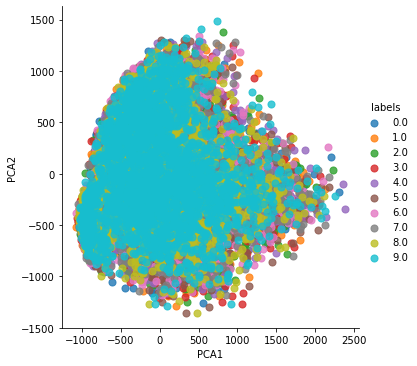

In [25]:
sns.lmplot('PCA1','PCA2',data=df,fit_reg=False,scatter_kws={'s':50},hue='labels')
plt.show()

### Logistic Regression with pca components(2)

In [26]:
mod_lg_pca=LogisticRegression().fit(img,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
y_pred_train=mod_lg_pca.predict(img)
acc_train = metrics.accuracy_score(y_train,y_pred_train)
acc_train

0.43555555555555553

In [34]:
test_image=pca1.transform(X_test)
y_pred_test=mod_lg_pca.predict(test_image)
acc_test = metrics.accuracy_score(y_test,y_pred_test)
acc_test

0.4340952380952381

- The model is not performing well with just 2 columns

### SVM with PCA components(2)

In [43]:
mod_svc_pca=SVC(C=1).fit(img,y_train)

In [44]:
y_pred_svc_tr=mod_svc_pca.predict(img)
svc_acc_train = metrics.accuracy_score(y_train,y_pred_svc_tr)
svc_acc_train

0.46825396825396826

In [45]:
test_image=pca1.transform(X_test)
y_pred_svc_te=mod_svc_pca.predict(test_image)
svc_acc_test = metrics.accuracy_score(y_test,y_pred_svc_te)
svc_acc_test

0.4705714285714286

### PCA

In [35]:
pca2=PCA(0.90)

In [36]:
pca_model=pca2.fit_transform(X_train)

In [37]:
pca2.n_components_

87

### Logitic Regression after PCA 

### train

In [39]:
log_pca=LogisticRegression().fit(pca_model,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
lp_pred=log_pca.predict(pca_model)
lp_acc=metrics.accuracy_score(y_train,lp_pred)
lp_acc

0.9173015873015873

### test performace

In [42]:
test_lg=pca2.transform(X_test)
lp_pred_test=log_pca.predict(test_lg)
lp_acc_test=metrics.accuracy_score(y_test,lp_pred_test)
lp_acc_test

0.9075238095238095

### SVM after pca

In [46]:
svm_pca=SVC(C=1).fit(pca_model,y_train)

### train svm with pca

In [48]:
sp_pred=svm_pca.predict(pca_model)
sp_acc=metrics.accuracy_score(y_train,sp_pred)
sp_acc

0.9915873015873016

### test svm after pca

In [49]:
test_sp=pca2.transform(X_test)
sp_pred_test=svm_pca.predict(test_sp)
sp_acc_test=metrics.accuracy_score(y_test,sp_pred_test)
sp_acc_test

0.9794285714285714

In [ ]:
dataframe={'Name':['logistic','SVC'],
           'Train accuracy before PCA':['0.9430952380952381','0.940952380952381'],
           'Test accuracy before PCA':['0.9111111111111111','0.9738095238095238'],
           "Train accuracy after PCA":['0.9179591836734694','0.991156462585034'],
           'Test accuracy after PCA':['0.9062698412698412','0.9788888888888889']}

### Comparison of models and their performance 

In [51]:
model_name=['Logistic Regression','SVC','Logistic Regression(pca=2)','SVC(pca=2)','Logistic Regression(pca)','SVC(pca)']
accuracy=[acc_lg,acc_svc,acc_test,svc_acc_test,lp_acc_test,sp_acc_test]

In [56]:
model_performance=pd.DataFrame()

In [57]:
model_performance["Model"]=model_name
model_performance["Accuracy"]=accuracy

In [58]:
model_performance

,Model,Accuracy
0,Logistic Regression,0.911429
1,SVC,0.974571
2,Logistic Regression(pca=2),0.434095
3,SVC(pca=2),0.470571
4,Logistic Regression(pca),0.907524
5,SVC(pca),0.979429
